# KNN
We'll be using the K-nearest neighbors algorithm to predict how many points NBA players scored in a season. 

In [408]:
import pandas as pd
from sklearn import preprocessing


In [409]:
df = pd.read_csv("nba_2013.csv")


print(df.columns.values)

['player' 'pos' 'age' 'bref_team_id' 'g' 'gs' 'mp' 'fg' 'fga' 'fg.' 'x3p'
 'x3pa' 'x3p.' 'x2p' 'x2pa' 'x2p.' 'efg.' 'ft' 'fta' 'ft.' 'orb' 'drb'
 'trb' 'ast' 'stl' 'blk' 'tov' 'pf' 'pts' 'season' 'season_end']


In [410]:
df

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013
5,Cole Aldrich,C,25,NYK,46,2,330,33,61,0.541,...,92,129,14,8,30,18,40,92,2013-2014,2013
6,LaMarcus Aldridge,PF,28,POR,69,69,2498,652,1423,0.458,...,599,765,178,63,68,123,147,1603,2013-2014,2013
7,Lavoy Allen,PF,24,TOT,65,2,1072,134,300,0.447,...,192,311,71,24,33,44,126,303,2013-2014,2013
8,Ray Allen,SG,38,MIA,73,9,1936,240,543,0.442,...,182,205,143,54,8,84,115,701,2013-2014,2013
9,Tony Allen,SG,32,MEM,55,28,1278,204,413,0.494,...,129,208,94,90,19,90,121,495,2013-2014,2013


In [411]:
df.dtypes

player           object
pos              object
age               int64
bref_team_id     object
g                 int64
gs                int64
mp                int64
fg                int64
fga               int64
fg.             float64
x3p               int64
x3pa              int64
x3p.            float64
x2p               int64
x2pa              int64
x2p.            float64
efg.            float64
ft                int64
fta               int64
ft.             float64
orb               int64
drb               int64
trb               int64
ast               int64
stl               int64
blk               int64
tov               int64
pf                int64
pts               int64
season           object
season_end        int64
dtype: object

In [412]:
# choosing only numeric columns
df = df.select_dtypes(exclude = ['object'] )
df = df.drop(['season_end'],axis = 1)
df = df.drop(['season'],axis = 1)

ValueError: labels ['season'] not contained in axis

In [413]:
# zero out missing values ONLY FOR DEMONSTRATION, IN REAL LIFE MUST BE IMPUTED
df.isnull().sum()

age      0
g        0
gs       0
mp       0
fg       0
fga      0
fg.      2
x3p      0
x3pa     0
x3p.    67
x2p      0
x2pa     0
x2p.     3
efg.     2
ft       0
fta      0
ft.     20
orb      0
drb      0
trb      0
ast      0
stl      0
blk      0
tov      0
pf       0
pts      0
dtype: int64

In [414]:
df.fillna(0,inplace = True)

In [415]:
df.isnull().sum()

age     0
g       0
gs      0
mp      0
fg      0
fga     0
fg.     0
x3p     0
x3pa    0
x3p.    0
x2p     0
x2pa    0
x2p.    0
efg.    0
ft      0
fta     0
ft.     0
orb     0
drb     0
trb     0
ast     0
stl     0
blk     0
tov     0
pf      0
pts     0
dtype: int64

In [416]:
y = df['pts']
x = df.drop(['pts'],axis = 1)

## Normalizing our Columns

Since we are dealing with KNN, we have to care about scaling. Some columns are large in absolute terms, and thus may dwarf the impact of other columns in the euclidean distance calculations.

This can be bad, because a variable having larger values doesn't necessarily make it better at predicting what rows are similar.

A simple way to deal with this is to normalize all the columns to have a mean of 0, and a standard deviation of 1. This will ensure that no single column has a dominant impact on the euclidean distance calculations.



In [417]:
x = x.values #returns a numpy array

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [418]:
y = y.values

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(y)
df_y = pd.DataFrame(x_scaled)

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [419]:
df

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.20,0.756098,0.000000,0.271067,0.077739,0.083531,0.468,0.015326,0.024390,0.266667,...,0.065839,0.660,0.163636,0.183908,0.193896,0.038835,0.120419,0.118721,0.101695,0.446886
1,0.05,0.975610,0.243902,0.383211,0.109541,0.109597,0.503,0.000000,0.000000,0.000000,...,0.168944,0.581,0.322727,0.242656,0.298025,0.059639,0.209424,0.260274,0.240678,0.743590
2,0.40,0.634146,0.146341,0.307594,0.168433,0.162915,0.520,0.000000,0.000000,0.000000,...,0.147826,0.639,0.231818,0.260536,0.274686,0.052705,0.125654,0.164384,0.132203,0.395604
3,0.45,0.878049,0.890244,0.817366,0.546525,0.598934,0.459,0.490421,0.487805,0.426667,...,0.417391,0.815,0.072727,0.293742,0.235189,0.343967,0.183246,0.013699,0.494915,0.498168
4,0.30,0.670732,0.365854,0.304390,0.160188,0.147512,0.546,0.000000,0.001626,0.000000,...,0.083230,0.836,0.213636,0.233716,0.248654,0.055479,0.120419,0.210046,0.213559,0.684982
5,0.30,0.548780,0.024390,0.105415,0.038869,0.036137,0.541,0.000000,0.000000,0.000000,...,0.037267,0.867,0.084091,0.117497,0.115799,0.019417,0.041885,0.136986,0.061017,0.146520
6,0.45,0.829268,0.841463,0.800064,0.767962,0.843009,0.458,0.011494,0.024390,0.200000,...,0.447205,0.822,0.377273,0.765006,0.686715,0.246879,0.329843,0.310502,0.416949,0.538462
7,0.25,0.780488,0.024390,0.343159,0.157833,0.177725,0.447,0.007663,0.021138,0.153846,...,0.062112,0.660,0.270455,0.245211,0.279174,0.098474,0.125654,0.150685,0.149153,0.461538
8,0.95,0.878049,0.109756,0.619994,0.282686,0.321682,0.442,0.444444,0.502439,0.375405,...,0.144099,0.905,0.052273,0.232439,0.184022,0.198336,0.282723,0.036530,0.284746,0.421245
9,0.65,0.658537,0.341463,0.409164,0.240283,0.244668,0.494,0.042146,0.076423,0.234043,...,0.150311,0.628,0.179545,0.164751,0.186715,0.130374,0.471204,0.086758,0.305085,0.443223


In [420]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,...,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000
mean,0.375468,0.637239,0.311850,0.396151,0.227187,0.251459,0.434622,0.151775,0.179075,0.245397,...,0.149866,0.692380,0.126843,0.207940,0.196255,0.156084,0.205658,0.110064,0.243603,0.387799
std,0.209913,0.308814,0.361689,0.287491,0.202394,0.218514,0.102401,0.194849,0.215856,0.176482,...,0.163032,0.213133,0.141139,0.185630,0.179853,0.181719,0.182113,0.140983,0.212548,0.260856
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.378049,0.000000,0.123999,0.055359,0.065166,0.400000,0.000000,0.004878,0.000000,...,0.027329,0.640000,0.027273,0.054917,0.049372,0.027739,0.047120,0.018265,0.071186,0.161172
50%,0.350000,0.731707,0.121951,0.365268,0.171967,0.196682,0.437000,0.061303,0.078049,0.314607,...,0.090683,0.750000,0.079545,0.172414,0.150808,0.090153,0.167539,0.063927,0.196610,0.380952
75%,0.500000,0.914634,0.658537,0.645626,0.361602,0.398104,0.479000,0.260536,0.313821,0.366460,...,0.222360,0.816000,0.165909,0.293742,0.278276,0.210818,0.314136,0.146119,0.366102,0.578755
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Split into Train and Test

In [336]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df,df_y,test_size = 0.3)

In [337]:
x_train.shape

(336, 25)

In [338]:
y_train.shape

(336, 1)

In [421]:
from sklearn.neighbors import KNeighborsRegressor


knn = KNeighborsRegressor()

knn.fit(x_train,y_train)
# Make point predictions on the test set using the fit model.


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [340]:
y_train.shape

(336, 1)

In [285]:
predictions_train = knn.predict(x_train)

In [286]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [287]:
rmse_train = sqrt(mean_squared_error(predictions_train,y_train))

In [288]:
rmse_train

0.028147407128808533

## Tuning 
At this point, we have to find values of K that minimize the train rmse. We will do by having a validation set held out via K-fold cross validation. In k-fold cross validation (the k is totally unrelated to K) involves randomly dividing the training set into k groups, or folds, of approximately equal size. The first fold is treated as a validation set, and the method is fit on the remaining k−1 folds. The misclassification rate is then computed on the observations in the held-out fold. This procedure is repeated k times; each time, a different group of observations is treated as a validation set. This process results in k estimates of the test error which are then averaged out. So each result is an average of K models. 

In [422]:
knn_k_values = list(range(1,30))

In [295]:
from math import sqrt
from sklearn.model_selection import cross_val_score
cv_scores = []
for k in knn_k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train,10, cv= scoring='neg_mean_squared_error')
    cv_scores.append(sqrt(abs(scores.mean())))

In [296]:
cv_scores

[0.04181517079711655,
 0.03613331663743811,
 0.03576693430522966,
 0.03590103507447338,
 0.036341965424389444,
 0.03656043092367904,
 0.03740754453097262,
 0.03896096821184395,
 0.03924945115304185,
 0.03957231712988443,
 0.03995484355747046,
 0.0402977613359609,
 0.04102356344597432,
 0.0412196918737542,
 0.04101875934051161,
 0.04132140961824846,
 0.04193037243647651,
 0.042280099236260714,
 0.043029150095914216,
 0.04364032554028936,
 0.044482866983084644,
 0.04461696731886122,
 0.044819804716495236,
 0.0452794107385732,
 0.045965656091332574,
 0.04635611233654867,
 0.04681156305201423,
 0.046964188246119455,
 0.04766589934601674]

The optimal number of neighbors is 3


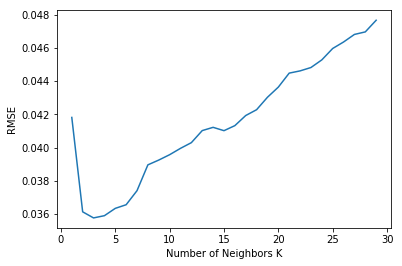

In [423]:
import matplotlib.pyplot as plt


# determining best k
optimal_k = knn_k_values[cv_scores.index(min(cv_scores))]
print ("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(knn_k_values, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('RMSE')
plt.show()